In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, recall_score
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import catboost as cb
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
import xgboost
from imblearn.ensemble import BalancedBaggingClassifier 
from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.shape

(800, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  800 non-null    int64  
 1   Cement              800 non-null    float64
 2   Blast Furnace Slag  800 non-null    float64
 3   Fly Ash             800 non-null    float64
 4   Water               800 non-null    float64
 5   Superplasticizer    800 non-null    float64
 6   Coarse Aggregate    800 non-null    float64
 7   Fine Aggregate      800 non-null    float64
 8   Age                 800 non-null    int64  
 9   Strength            800 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 62.6 KB


In [4]:
df.describe()

,Id,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,629.5000,285.412500,72.279375,52.672500,181.895625,6.124500,973.810375,772.093125,46.608750,36.218325
std,231.0844,106.020958,86.547254,63.627917,21.755194,6.008909,78.729449,80.779009,63.957105,16.797454
min,230.0000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,429.7500,198.600000,0.000000,0.000000,164.900000,0.000000,932.000000,723.850000,7.000000,23.830000
50%,629.5000,276.050000,20.000000,0.000000,185.700000,6.100000,968.000000,779.850000,28.000000,34.755000
75%,829.2500,359.000000,142.500000,118.200000,193.000000,10.300000,1034.250000,822.650000,56.000000,47.152500
max,1029.0000,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Корреляция

In [5]:
corr_matrix = df.corr()
corr_matrix["Strength"].sort_values(ascending=False)

Strength              1.000000
Cement                0.497831
Superplasticizer      0.361332
Age                   0.330996
Blast Furnace Slag    0.123579
Id                    0.023882
Fly Ash              -0.103265
Coarse Aggregate     -0.168176
Fine Aggregate       -0.171005
Water                -0.281885
Name: Strength, dtype: float64

## Разделение выборки на трейн и тест

In [6]:
X = df[['Cement',"Blast Furnace Slag", "Superplasticizer", "Age", "Coarse Aggregate",
       "Water"]]
y = df['Strength']
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
num_cols = [
    "Cement",
    "Blast Furnace Slag",
    "Superplasticizer",
    "Age",
    "Coarse Aggregate",
    "Water"
]

Histogram for Cement


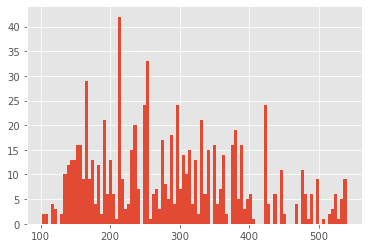

Histogram for Blast Furnace Slag


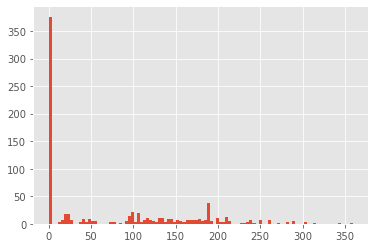

Histogram for Superplasticizer


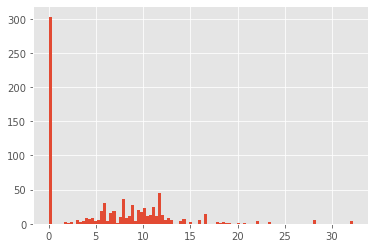

Histogram for Age


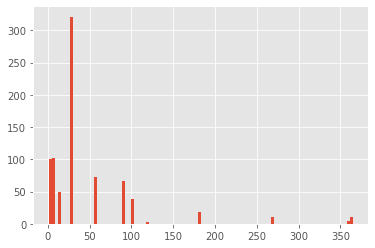

Histogram for Coarse Aggregate


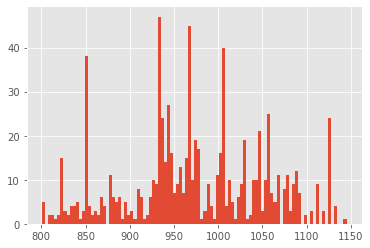

Histogram for Water


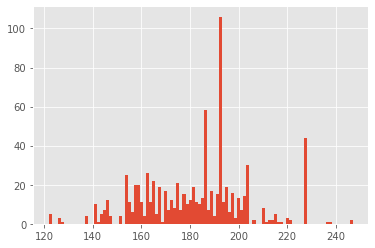

In [8]:
for col in num_cols:
    print(f'Histogram for {col}')
    df[col].hist(bins=100)
    plt.show()

## Работа с выбросами

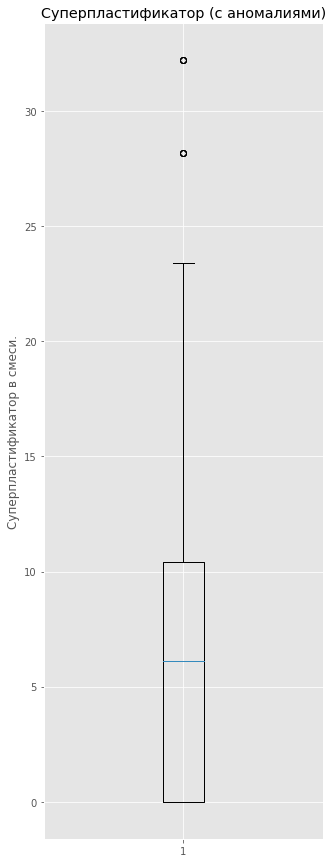

In [9]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(train_x.Superplasticizer)
ax.set_ylabel('Cуперпластификатор в смеси.')
ax.set_title('Cуперпластификатор (с аномалиями)')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

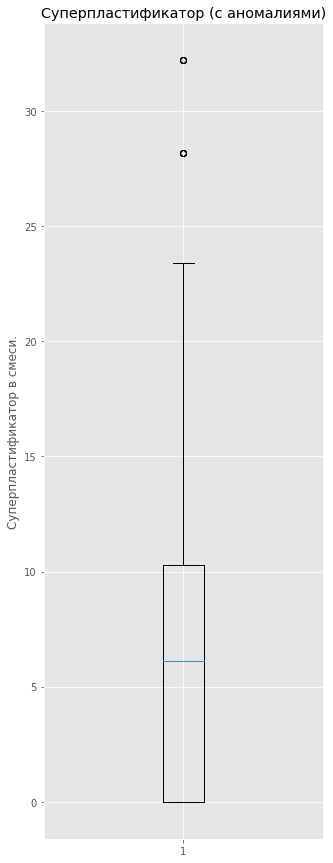

In [10]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(df.Superplasticizer)
ax.set_ylabel('Cуперпластификатор в смеси.')
ax.set_title('Cуперпластификатор (с аномалиями)')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [11]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

In [12]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries
boundaries = calculate_outliers(train_x.Superplasticizer)
boundaries

(-15.600000000000001, 26.0)

In [13]:
is_outlier = (train_x.Superplasticizer < boundaries[0]) | (df.Superplasticizer > boundaries[1])
is_outlier.sum()

8

In [14]:
train_x.loc[is_outlier, 'Superplasticizer'] = int(boundaries[1])
is_outlier = (train_x.Superplasticizer < boundaries[0]) | (train_x.Superplasticizer > boundaries[1])
is_outlier.sum()

0

In [15]:
boundaries = calculate_outliers(test_x['Superplasticizer'])
boundaries

(-14.7375, 24.5625)

In [16]:
is_outlier = (test_x.Superplasticizer < boundaries[0]) | (test_x.Superplasticizer > boundaries[1])
is_outlier.sum()

1

In [17]:
test_x.loc[is_outlier, 'Superplasticizer'] = int(boundaries[1])
is_outlier = (test_x.Superplasticizer < boundaries[0]) | (test_x.Superplasticizer > boundaries[1])
is_outlier.sum()

0

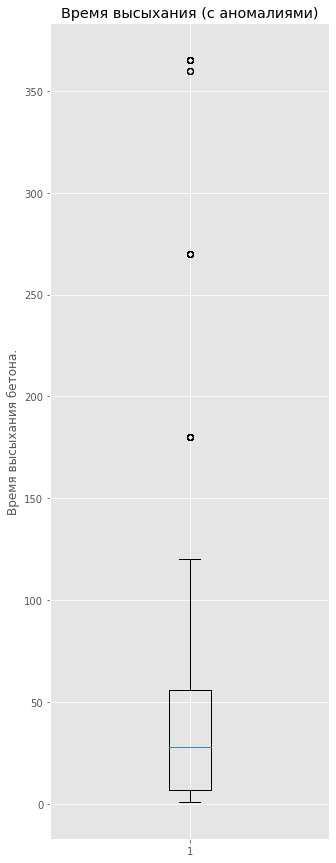

In [18]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(train_x.Age)
ax.set_ylabel('Время высыхания бетона.')
ax.set_title('Время высыхания (с аномалиями)')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [19]:
boundaries = calculate_outliers(train_x.Age)
boundaries

(-66.5, 129.5)

In [20]:
is_outlier = (train_x.Age < boundaries[0]) | (train_x.Age > boundaries[1])
is_outlier.sum()

37

In [21]:
train_x.loc[is_outlier, 'Age'] = int(boundaries[1])
is_outlier = (train_x.Age < boundaries[0]) | (train_x.Age > boundaries[1])
is_outlier.sum()

0

In [22]:
boundaries = calculate_outliers(test_x.Age)
boundaries

(-66.5, 129.5)

In [23]:
is_outlier = (test_x.Age < boundaries[0]) | (test_x.Age > boundaries[1])
is_outlier.sum()

9

In [24]:
test_x.loc[is_outlier, 'Age'] = int(boundaries[1])
is_outlier = (test_x.Age < boundaries[0]) | (test_x.Age > boundaries[1])
is_outlier.sum()

0

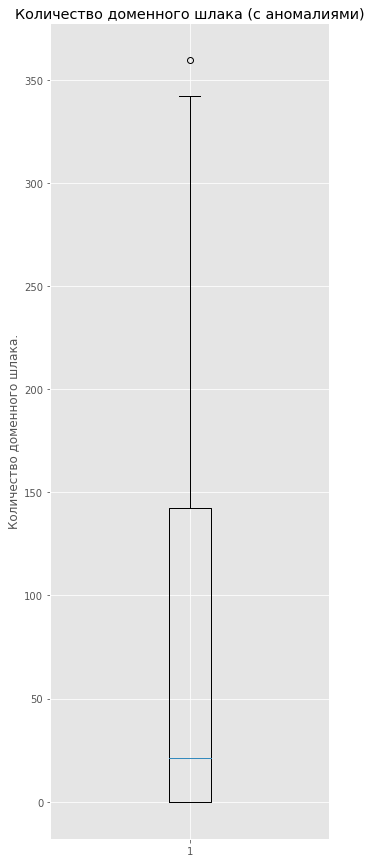

In [25]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(train_x["Blast Furnace Slag"])
ax.set_ylabel('Количество доменного шлака.')
ax.set_title('Количество доменного шлака (с аномалиями)')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))


In [26]:
boundaries = calculate_outliers(train_x["Blast Furnace Slag"])
is_outlier = (train_x["Blast Furnace Slag"] < boundaries[0]) | (train_x["Blast Furnace Slag"] > boundaries[1])
is_outlier.sum()

1

In [27]:
train_x.loc[is_outlier, 'Blast Furnace Slag'] = int(boundaries[1])
is_outlier = (train_x["Blast Furnace Slag"] < boundaries[0]) | (train_x["Blast Furnace Slag"] > boundaries[1])
is_outlier.sum()

0

In [28]:
boundaries = calculate_outliers(test_x["Blast Furnace Slag"])
is_outlier = (test_x["Blast Furnace Slag"] < boundaries[0]) | (test_x["Blast Furnace Slag"] > boundaries[1])
is_outlier.sum()

0

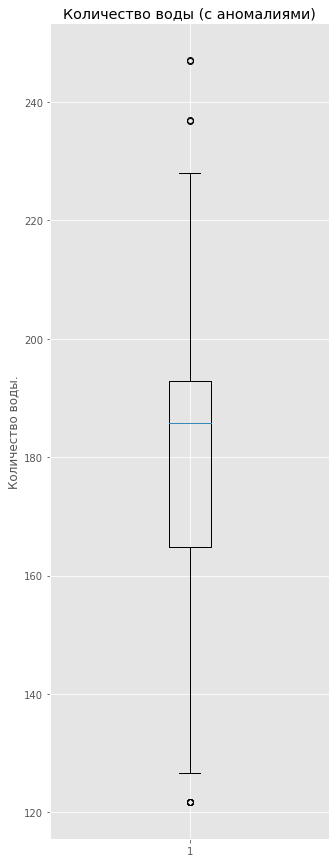

In [29]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(train_x["Water"])
ax.set_ylabel('Количество воды.')
ax.set_title('Количество воды (с аномалиями)')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [30]:
boundaries = calculate_outliers(train_x["Water"])
is_outlier = (train_x["Water"] < boundaries[0]) | (train_x["Water"] > boundaries[1])
is_outlier.sum()

9

In [31]:
train_x.loc[is_outlier, "Water"] = int(boundaries[1])
is_outlier = (train_x["Water"] < boundaries[0]) | (train_x["Water"] > boundaries[1])
is_outlier.sum()

0

In [32]:
boundaries = calculate_outliers(test_x["Water"])
is_outlier = (test_x["Water"] < boundaries[0]) | (test_x["Water"] > boundaries[1])
is_outlier.sum()

7

In [33]:
test_x.loc[is_outlier, "Water"] = int(boundaries[1])
is_outlier = (test_x["Water"] < boundaries[0]) | (test_x["Water"] > boundaries[1])
is_outlier.sum()

0

In [34]:
boundaries = calculate_outliers(train_x["Cement"])
is_outlier = (train_x["Cement"] < boundaries[0]) | (train_x["Cement"] > boundaries[1])
is_outlier.sum()

0

In [35]:
boundaries = calculate_outliers(test_x["Cement"])
is_outlier = (test_x["Cement"] < boundaries[0]) | (test_x["Cement"] > boundaries[1])
is_outlier.sum()

0

In [36]:
boundaries = calculate_outliers(train_x["Coarse Aggregate"])
is_outlier = (train_x["Coarse Aggregate"] < boundaries[0]) | (train_x["Coarse Aggregate"] > boundaries[1])
is_outlier.sum()

0

In [37]:
boundaries = calculate_outliers(test_x["Coarse Aggregate"])
is_outlier = (test_x["Coarse Aggregate"] < boundaries[0]) | (test_x["Coarse Aggregate"] > boundaries[1])
is_outlier.sum()

0

## Стандартизация

In [38]:
scaler = StandardScaler()

x_train_mm = scaler.fit_transform(train_x[num_cols])
X_train_mm = pd.DataFrame(data = x_train_mm,  
                  columns =['Cement_std', "Blast Furnace Slag_std", "Superplasticizer_std",
                           "Age_std", "Coarse Aggregate_std", "Water_std"
                           ])
x_test_mm = scaler.transform(test_x[num_cols])
X_test_mm = pd.DataFrame(data = x_test_mm,  
                  columns =['Cement_std', "Blast Furnace Slag_std", "Superplasticizer_std",
                           "Age_std", "Coarse Aggregate_std", "Water_std"
                           ])
train_x1 = pd.concat([X_train_mm, train_x.reset_index(drop=True)], axis=1)
test_x1 = pd.concat([X_test_mm, test_x.reset_index(drop=True)], axis=1)
columns_for_drop = [ "Cement","Blast Furnace Slag","Superplasticizer","Age","Coarse Aggregate",
                    "Water"]
train_x1 = train_x1.drop(columns=columns_for_drop) 
test_x1 = test_x1.drop(columns=columns_for_drop) 

In [39]:
X = pd.concat([train_x1, test_x1], axis = 0, ignore_index = True) 
y = pd.concat([train_y, test_y], axis = 0, ignore_index = True) 

In [40]:
print(X.shape, y.shape)

(800, 6) (800,)


## Машинное обучение

### Линейная регрессия

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(train_x1, train_y)
y_predict_train = model.predict(train_x1)
y_predict_test = model.predict(test_x1)
print(f'MSE: {mean_squared_error(train_y, y_predict_train, squared = False)}')
print(f'MSE: {mean_squared_error(test_y, y_predict_test, squared = False)}')

MSE: 9.127108721301646
MSE: 8.84571241793478


### Lasso регуляризация

In [43]:
from sklearn.linear_model import Lasso
coef = []
for i in range(-4, 5):
    alpha = 10**i
    lasso_regression = Lasso(alpha=alpha) # alpha — величина регуляризации

  # обучение
    lasso_regression.fit(train_x1, train_y)
    y_predict_train = lasso_regression.predict(train_x1)
    y_predict_test = lasso_regression.predict(test_x1)
    
  # вывод точности предсказания
    print('-'*5, 'lambda =', alpha, '-'*5)
    print(mean_squared_error(train_y, y_predict_train, squared = False))
    print(mean_squared_error(test_y, y_predict_test, squared = False))

----- lambda = 0.0001 -----
9.127108724437468
8.845704232349489
----- lambda = 0.001 -----
9.127109034882091
8.845630778537005
----- lambda = 0.01 -----
9.127139558073806
8.845035190444618
----- lambda = 0.1 -----
9.130168674630996
8.841641239197036
----- lambda = 1 -----
9.417393521690697
9.050142502364494
----- lambda = 10 -----
17.148706791955906
15.254465310473758
----- lambda = 100 -----
17.148706791955906
15.254465310473758
----- lambda = 1000 -----
17.148706791955906
15.254465310473758
----- lambda = 10000 -----
17.148706791955906
15.254465310473758


### Ridge регуляризация

In [44]:
from sklearn.linear_model import Ridge
for i in range(-7, -1):
    alpha = 10**i
    ridge_regression = Ridge(alpha=alpha)  # alpha — величина регуляризации

  # обучение
    ridge_regression.fit(train_x1, train_y)
    y_predict_train = ridge_regression.predict(train_x1)
    y_predict_test = ridge_regression.predict(test_x1)
    
  # вывод точности предсказания
    print('-'*5, 'lambda =', alpha, '-'*5)
    print(mean_squared_error(train_y, y_predict_train, squared = False))
    print(mean_squared_error(test_y, y_predict_test, squared = False))

----- lambda = 1e-07 -----
9.127108721301646
8.84571241808179
----- lambda = 1e-06 -----
9.127108721301646
8.845712419404885
----- lambda = 1e-05 -----
9.12710872130165
8.845712432635827
----- lambda = 0.0001 -----
9.127108721302
8.845712564945492
----- lambda = 0.001 -----
9.127108721337047
8.845713888065674
----- lambda = 0.01 -----
9.12710872484164
8.845727121621113


### ElasticNet регуляризация

In [45]:
from sklearn.linear_model import ElasticNet
elastic_regression = ElasticNet() 
elastic_regression.fit(train_x1, train_y)
y_predict_train = elastic_regression.predict(train_x1)
y_predict_test = elastic_regression.predict(test_x1)
print(mean_squared_error(train_y, y_predict_train, squared = False))
print(mean_squared_error(test_y, y_predict_test, squared = False))

10.7310525039519
10.300535665820622


### Ближайшие соседи

In [46]:
total = 300
k = 0
from sklearn.neighbors import KNeighborsRegressor
for k in range(1, 30):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_x1, train_y)
    y_predict_test = knn.predict(test_x1)
    mse = mean_squared_error(test_y, y_predict_test, squared = False)
    if mse < total:
        total = mse
        k_best = k
print("Лучшая MSE", total)
print("Количество ближайших соседей", k_best)

Лучшая MSE 7.599225497645302
Количество ближайших соседей 4


### SGDRegressor

In [47]:
from sklearn.linear_model import SGDRegressor
linear_regression_model = SGDRegressor(loss = 'squared_error',
            penalty = 'l2',
            alpha = 0.0001,
            max_iter = 50000,
            learning_rate = 'constant',
            eta0 = 0.001,
            tol=.00001,
            random_state = 42)
linear_regression_model.fit(train_x1, train_y)
predictions = linear_regression_model.predict(test_x1)
mse = mean_squared_error(test_y, predictions, squared = False) 
print("RMSE: {}".format(mse))

RMSE: 8.83852183542102


In [48]:
linear_regression_model = SGDRegressor(loss = 'squared_error',
            penalty = 'l1',
            alpha = 0.001,
            max_iter = 50000,
            learning_rate = 'constant',
            eta0 = 0.001,
            tol=.00001,
            random_state = 42)
linear_regression_model.fit(train_x1, train_y)
predictions = linear_regression_model.predict(test_x1)
mse = mean_squared_error(test_y, predictions, squared = False) 
print("RMSE: {}".format(mse))

RMSE: 8.838367085764451


### Случайный лес

In [49]:
from sklearn.ensemble import RandomForestRegressor
random_regression_model = RandomForestRegressor(random_state = 42)
random_regression_model.fit(train_x1, train_y)
predictions = random_regression_model.predict(test_x1)
mse = mean_squared_error(test_y, predictions, squared = False) 

print("RMSE: {}".format(mse))

RMSE: 5.049212432610214


### Тюнинг модели случайного леса

Text(0, 0.5, 'f on test')

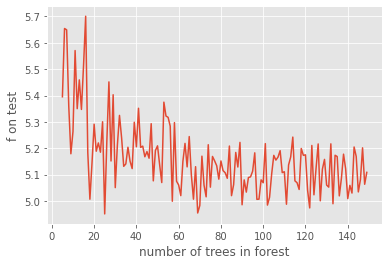

In [50]:
N = []
f = []
for n in np.arange(5, 150, 1):
    rf = RandomForestRegressor(n_estimators = n)
    rf.fit(train_x1, train_y)
    pred_rf = rf.predict(test_x1)
    N.append(n)
    f.append(mean_squared_error(test_y, pred_rf, squared = False))

plt.plot(N, f, '-')
plt.xlabel('number of trees in forest')
plt.ylabel('f on test')

In [51]:
f_imp_list1 = list(zip(N, f))
f_imp_list1.sort(key = lambda x: x[1])
f_imp_list1[:10]

[(25, 4.950764162422726),
 (69, 4.954295188166614),
 (122, 4.973519721676912),
 (70, 4.982765797048567),
 (102, 4.984264300541065),
 (90, 4.985430852752679),
 (111, 4.987514147704967),
 (133, 4.989293636246602),
 (57, 4.9988149254234395),
 (127, 5.000440243828144)]

In [52]:
random_regression_model1 = RandomForestRegressor(random_state = 42, n_estimators=25)
random_regression_model1.fit(train_x1, train_y)
predictions = random_regression_model1.predict(test_x1)
mse = mean_squared_error(test_y, predictions, squared = False) 
print("RMSE: {}".format(mse))

RMSE: 5.441381199129347


In [53]:
random_regression_model1 = RandomForestRegressor(random_state = 42, n_estimators=25)
random_regression_model1.fit(X, y)
predictions = random_regression_model1.predict(X)
mse = mean_squared_error(y, predictions, squared = False) 
print("RMSE: {}".format(mse))

RMSE: 2.042234720481562


In [54]:
random_regression_model2 = RandomForestRegressor()
random_regression_model2.fit(train_x1, train_y)
predictions = random_regression_model2.predict(test_x1)
mse = mean_squared_error(test_y, predictions, squared = False) 

print("RMSE: {}".format(mse))

RMSE: 5.141803842683059


In [55]:
random_regression_model2.fit(X, y)
predictions = random_regression_model2.predict(X)
mse = mean_squared_error(y, predictions, squared = False) 
print("RMSE: {}".format(mse))

RMSE: 1.906633089222282


### Catboost

In [56]:
from catboost import CatBoostRegressor
N = []
f1 = []

for n in np.arange(10, 150, 5):
    rf = cb.CatBoostRegressor(logging_level='Silent', n_estimators = n)    
    rf.fit(train_x1, train_y)
    pred = rf.predict(test_x1)
    N.append(n)
    f1.append(mean_squared_error(test_y, pred, squared = False))
f_imp_list2 = list(zip(N, f1))
f_imp_list2.sort(key = lambda x: x[1])
f_imp_list2[:10]

[(55, 4.32426596819128),
 (140, 4.334519374707609),
 (65, 4.340065311357807),
 (135, 4.386003595015792),
 (60, 4.399417076482631),
 (130, 4.406594087932988),
 (110, 4.410834475541278),
 (145, 4.4127680472606645),
 (45, 4.41289238581944),
 (120, 4.450893879928846)]

In [57]:
best1 = cb.CatBoostRegressor(logging_level='Silent', n_estimators = 55)
best1.fit(train_x1, train_y)
predictions = best1.predict(test_x1)
mse = mean_squared_error(test_y, predictions) 
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 4.32426596819128


In [58]:
best1 = cb.CatBoostRegressor(logging_level='Silent', n_estimators = 55)
best1.fit(X, y)
predictions = best1.predict(X)
mse = mean_squared_error(y, predictions, squared = False) 
print("RMSE: {}".format(mse))

RMSE: 2.5979837845311833


### Gradient Descent

In [59]:
def gradient_descent(X, y, alpha=0.001, epochs=5000):
    m = np.shape(X)[0]  
    n = np.shape(X)[1]  
    X = np.concatenate((np.ones((m, 1)), X), axis=1)
    W = np.random.randn(n + 1, )
 
    for current_iteration in range(epochs):  
        y_estimated = X.dot(W)
        error = y_estimated - y
        gradient = (1 / m) * X.T.dot(error)
        W = W - alpha * gradient
    return W

In [60]:
def print_metrics(test_y, y_predict_test):
    print(f'MSE: {mean_squared_error(test_y, y_predict_test, squared = False)}')

In [61]:
w = gradient_descent(train_x1, train_y, alpha=0.001, epochs=25000)
n = test_x.shape[0]
test_x11 = np.hstack([np.ones(n).reshape(-1,1),test_x1])
y_hat = test_x11.dot(w.T)
print_metrics(test_y, y_hat)

MSE: 8.84624905713549


### Pytorch

In [62]:
import torch
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

In [63]:
X_train = train_x1.to_numpy()
X_train = torch.from_numpy(X_train).type(torch.float32)
X_train = X_train.unsqueeze_(1) 
Y_train = train_y.to_numpy()
Y_train = torch.from_numpy(Y_train).type(torch.float32)
Y_train = Y_train.unsqueeze_(1)
x_validation = test_x1.to_numpy()
x_validation = torch.from_numpy(x_validation).type(torch.float32)
x_validation = x_validation.unsqueeze_(1)
y_validation = test_y.to_numpy()
y_validation = torch.from_numpy(y_validation).type(torch.float32)
y_validation = y_validation.unsqueeze_(1);

In [64]:
class SineNet(torch.nn.Module): 
    def __init__(self, n_hidden_neurons): 
        super(SineNet, self).__init__() 
        self.fc1 = torch.nn.Linear(train_x.shape[1], n_hidden_neurons)
        self.activ1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1) 
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(1)
optimizer = torch.optim.SGD(sine_net.parameters(), lr=0.01)
def loss(pred, target):
    squares = (pred - target) ** 2 
    return squares.mean()
for epoch_index in range(100): 
    optimizer.zero_grad()
    y_pred = sine_net.forward(X_train)
    loss_val = loss(y_pred, Y_train)
    loss_val.backward()
    optimizer.step()
print(np.sqrt(loss(sine_net.forward(x_validation), y_validation).item()))

15.272036280833213


## Полиноминальная регрессия

In [66]:
from sklearn.preprocessing import PolynomialFeatures
poly =  PolynomialFeatures(3, include_bias=False)
poly_df = poly.fit_transform(train_x)
poly_df1 = poly.transform(test_x)

In [67]:
print(poly_df.shape, poly_df1.shape)

(640, 83) (160, 83)


In [68]:
scaler = StandardScaler()
scaled_poly_df= scaler.fit_transform(poly_df)
scaled_poly_df1= scaler.transform(poly_df1)
print(scaled_poly_df.shape, scaled_poly_df1.shape)

(640, 83) (160, 83)


In [69]:
X = np.concatenate([scaled_poly_df, scaled_poly_df1], axis = 0) 
y = pd.concat([train_y, test_y], axis = 0, ignore_index = True)

In [70]:
print(X.shape, y.shape)

(800, 83) (800,)


In [71]:
model = LinearRegression().fit(scaled_poly_df, train_y)
y_predict_train = model.predict(scaled_poly_df)
y_predict_test = model.predict(scaled_poly_df1)
print(f'MSE: {mean_squared_error(train_y, y_predict_train, squared = False)}')
print(f'MSE: {mean_squared_error(test_y, y_predict_test, squared = False)}')

MSE: 5.00269998583786
MSE: 5.534412930310424


In [72]:
from sklearn.linear_model import Lasso
coef = []
for i in range(-4, 5):
    alpha = 10**i
    lasso_regression = Lasso(alpha=alpha) # alpha — величина регуляризации

  # обучение
    lasso_regression.fit(scaled_poly_df, train_y)
    y_predict_train = lasso_regression.predict(scaled_poly_df)
    y_predict_test = lasso_regression.predict(scaled_poly_df1)
    
  # вывод точности предсказания
    print('-'*5, 'lambda =', alpha, '-'*5)
    print(mean_squared_error(train_y, y_predict_train, squared = False))
    print(mean_squared_error(test_y, y_predict_test, squared = False))

----- lambda = 0.0001 -----
5.668956009258754
5.84480373776127
----- lambda = 0.001 -----
5.673644027373722
5.852875109299126
----- lambda = 0.01 -----
5.778651522248844
5.959665947075002
----- lambda = 0.1 -----
6.7752468261225145
6.655487260510755
----- lambda = 1 -----
8.811265515652638
8.777983024797928
----- lambda = 10 -----
17.148706791955906
15.254465310473758
----- lambda = 100 -----
17.148706791955906
15.254465310473758
----- lambda = 1000 -----
17.148706791955906
15.254465310473758
----- lambda = 10000 -----
17.148706791955906
15.254465310473758


In [73]:
from sklearn.ensemble import RandomForestRegressor
random_regression_model = RandomForestRegressor(random_state = 42)
random_regression_model.fit(scaled_poly_df, train_y)
predictions = random_regression_model.predict(scaled_poly_df1)
mse = mean_squared_error(test_y, predictions, squared = False) 

print("RMSE: {}".format(mse))

RMSE: 5.1658883938778555


Text(0, 0.5, 'f on test')

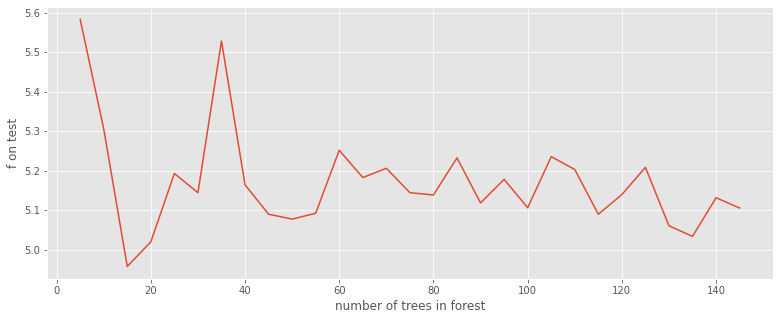

In [74]:
N = []
f = []
for n in np.arange(5, 150, 5):
    rf = RandomForestRegressor(n_estimators = n)
    rf.fit(scaled_poly_df, train_y)
    pred_rf = rf.predict(scaled_poly_df1)
    N.append(n)
    f.append(mean_squared_error(test_y, pred_rf, squared = False))

plt.plot(N, f, '-')
plt.xlabel('number of trees in forest')
plt.ylabel('f on test')

In [75]:
f_imp_list1 = list(zip(N, f))
f_imp_list1.sort(key = lambda x: x[1])
f_imp_list1[:10]

[(15, 4.957346831240648),
 (20, 5.019633739775288),
 (135, 5.033628669037223),
 (130, 5.060261690921704),
 (50, 5.077305416535977),
 (115, 5.089630912448396),
 (45, 5.089713255815451),
 (55, 5.0920934549599),
 (145, 5.105414940569478),
 (100, 5.106042980263893)]

In [76]:
random_regression_model1 = RandomForestRegressor(random_state = 42, n_estimators=15)
random_regression_model1.fit(scaled_poly_df, train_y)
predictions = random_regression_model1.predict(scaled_poly_df1)
mse = mean_squared_error(test_y, predictions, squared = False) 
print("RMSE: {}".format(mse))

RMSE: 5.303744697278855


In [77]:
from catboost import CatBoostRegressor
N = []
f1 = []

for n in np.arange(10, 150, 5):
    rf = cb.CatBoostRegressor(logging_level='Silent', n_estimators = n)    
    rf.fit(scaled_poly_df, train_y)
    pred = rf.predict(scaled_poly_df1)
    N.append(n)
    f1.append(mean_squared_error(test_y, pred, squared = False))
f_imp_list2 = list(zip(N, f1))
f_imp_list2.sort(key = lambda x: x[1])
f_imp_list2[:10]

[(140, 4.671033733458272),
 (145, 4.903276417463994),
 (80, 4.934155315625417),
 (95, 4.949980207426633),
 (130, 4.983763847896266),
 (85, 5.004144578535968),
 (120, 5.0147299465047634),
 (105, 5.047257788910165),
 (135, 5.0642551008782055),
 (125, 5.069456971796338)]

In [78]:
best1 = cb.CatBoostRegressor(logging_level='Silent', n_estimators = 140)
best1.fit(scaled_poly_df, train_y)
predictions = best1.predict(scaled_poly_df1)
mse = mean_squared_error(test_y, predictions) 
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 4.671033733458272
